In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load data
df = pd.read_csv(r"C:\Users\Berger\anaconda111\Ai practice\datasets\AAPL.csv")
df

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,12-12-1980,0.128348,0.128348,469033600,0.128906,0.128348,0.100453
1,15-12-1980,0.121652,0.122210,175884800,0.122210,0.121652,0.095213
2,16-12-1980,0.112723,0.113281,105728000,0.113281,0.112723,0.088224
3,17-12-1980,0.115513,0.115513,86441600,0.116071,0.115513,0.090408
4,18-12-1980,0.118862,0.118862,73449600,0.119420,0.118862,0.093029
...,...,...,...,...,...,...,...
10339,14-12-2021,172.210007,175.250000,139380400,177.740005,174.330002,174.330002
10340,15-12-2021,172.309998,175.110001,131063300,179.500000,179.300003,179.300003
10341,16-12-2021,170.750000,179.279999,150185800,181.139999,172.259995,172.259995
10342,17-12-2021,169.690002,169.929993,195432700,173.470001,171.139999,171.139999


In [3]:
# Data preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

In [4]:
# Split data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size,:], scaled_data[train_size:len(scaled_data),:]

In [5]:
# Define time steps and create input/output sequences
time_steps = 60
X_train, Y_train = [], []
for i in range(time_steps, len(train_data)):
    X_train.append(train_data[i-time_steps:i, 0])
    Y_train.append(train_data[i, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [6]:
X_test, Y_test = [], []
for i in range(time_steps, len(test_data)):
    X_test.append(test_data[i-time_steps:i, 0])
    Y_test.append(test_data[i, 0])
X_test, Y_test = np.array(X_test), np.array(Y_test)

In [7]:
# Reshape input data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [8]:
# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [9]:
# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
# Train model
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/50
257/257 [==============================] - 16s 47ms/step - loss: 2.2850e-05 - val_loss: 7.7535e-04
Epoch 2/50
257/257 [==============================] - 12s 47ms/step - loss: 2.5507e-06 - val_loss: 0.0017
Epoch 3/50
257/257 [==============================] - 13s 49ms/step - loss: 2.5849e-06 - val_loss: 0.0016
Epoch 4/50
257/257 [==============================] - 12s 45ms/step - loss: 2.6452e-06 - val_loss: 0.0017
Epoch 5/50
257/257 [==============================] - 11s 44ms/step - loss: 2.1414e-06 - val_loss: 6.6311e-04
Epoch 6/50
257/257 [==============================] - 11s 44ms/step - loss: 2.3091e-06 - val_loss: 8.4687e-04
Epoch 7/50
257/257 [==============================] - 11s 41ms/step - loss: 1.6191e-06 - val_loss: 0.0013
Epoch 8/50
257/257 [==============================] - 11s 44ms/step - loss: 1.8781e-06 - val_loss: 4.2049e-04
Epoch 9/50
257/257 [==============================] - 12s 45ms/step - loss: 1.8032e-06 - val_loss: 6.1110e-04
Epoch 10/50
257/257 [=====

In [11]:
# Evaluate model
train_loss = model.evaluate(X_train, Y_train, verbose=0)
test_loss = model.evaluate(X_test, Y_test, verbose=0)
print('Train loss: ', train_loss)
print('Test loss: ', test_loss)

Train loss:  7.560282142549113e-07
Test loss:  0.0001926540135173127


In [12]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

63/63 [==============================] - 1s 15ms/step


In [13]:
# Inverse transform predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

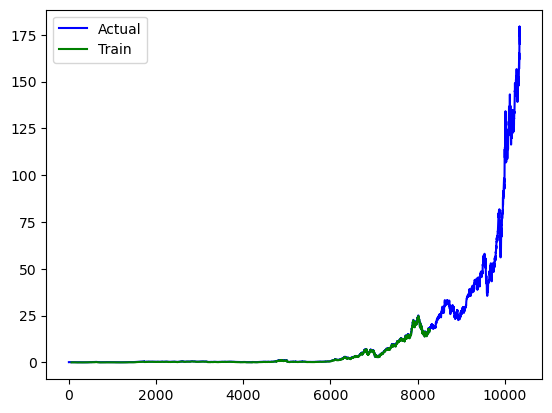

In [35]:
# Plot predictions
plt.plot(df['Close'].values, color='blue', label='Actual')
plt.plot(range(time_steps, time_steps+len(train_predict)), train_predict, color='green', label='Train')
plt.legend()
plt.show()